# DataKind Red Cross Project ACS Block Data Analysis 



In [40]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

## Data Preparation

In [74]:
acs_block_df = pd.read_csv('../../data/ACS 5YR Block Group Data.csv', dtype = {'GEOID': int})

In [75]:
acs_block_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217739 entries, 0 to 217738
Columns: 116 entries, GEOID to house_val_more_2M
dtypes: float64(105), int64(8), object(3)
memory usage: 192.7+ MB


In [76]:
acs_block_df.head()

,GEOID,county_name,state_name,NAME,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10K,house_val_10K_15K,house_val_15K_20K,house_val_20K_25K,house_val_25K_30K,house_val_30K_35K,house_val_35K_40K,house_val_40K_50K,house_val_50K_60K,house_val_60K_70K,house_val_70K_80K,house_val_80K_90K,house_val_90K_100K,house_val_100K_125K,house_val_125K_150K,house_val_150K_175K,house_val_175K_200K,house_val_200K_250K,house_val_250K_300K,house_val_300K_400K,house_val_400K_500K,house_val_500K_750K,house_val_750K_1M,house_val_1M_1.5M,house_val_1.5M_2M,house_val_more_2M
0,530020000000,Adams County,Washington,"Block Group 1, Census Tract 9501, Adams County...",842,64,0.076010,28484.0,0.738717,0.494062,0.166271,556,0.010791,0.000000,0.0,0.016187,0.026978,0.003597,0.012590,0.010791,0.294964,0.043165,0.131295,0.156475,0.196043,0.091727,0.005396,0.000000,641,0.628705,0.371295,0.956057,0.956057,0.043943,0.043943,0.029691,0.008314,0.005938,306,0.725490,0.689542,0.035948,0.000000,0.274510,0.254902,0.019608,319,0.959248,0.040752,0.774510,0.225490,0.000000,0.021944,0.000000,0.078370,0.109718,0.050157,0.194357,0.172414,0.373041,0.0,0.0721,0.131661,0.018809,0.009404,0.040752,0.056426,0.068966,0.068966,0.532915,0.009804,0.000000,0.666667,0.261438,0.000000,0.016340,0.0,0.045752,0.000000,1.000000,0.000000,0.949843,0.050157,0.350211,0.350211,0.000000,0.000000,0.0,0.649789,237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113924,0.000000,0.008439,0.042194,0.130802,0.000000,0.135021,0.109705,0.084388,0.177215,0.113924,0.0,0.054852,0.000000,0.029536,0.0,0.0
1,530020000000,Adams County,Washington,"Block Group 2, Census Tract 9501, Adams County...",922,94,0.101952,29939.0,0.737219,0.572597,0.228016,783,0.005109,0.005109,0.0,0.000000,0.003831,0.007663,0.006386,0.026820,0.307791,0.126437,0.143040,0.117497,0.141762,0.076628,0.019157,0.012771,851,0.603995,0.396005,0.906953,0.882413,0.093047,0.117587,0.002045,0.000000,0.061350,467,0.520343,0.428266,0.042827,0.049251,0.479657,0.430407,0.049251,571,0.817863,0.182137,0.695931,0.304069,0.029772,0.021016,0.068301,0.089317,0.129597,0.222417,0.087566,0.120841,0.231173,0.0,0.0000,0.012259,0.043783,0.063047,0.173380,0.066550,0.169877,0.087566,0.383538,0.680942,0.000000,0.282655,0.023555,0.000000,0.006424,0.0,0.000000,0.006424,0.968476,0.031524,0.935201,0.064799,0.455385,0.393846,0.036923,0.024615,0.0,0.544615,325,0.000000,0.009231,0.009231,0

In [77]:
acs_block_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GEOID,217739.0,2.811822e+11,1.572133e+11,1.001020e+10,1.311310e+11,2.805900e+11,4.104200e+11,5.604600e+11
tot_population,217739.0,1.437724e+03,9.414765e+02,0.000000e+00,8.690000e+02,1.236000e+03,1.768000e+03,5.167600e+04
in_poverty,217739.0,2.096563e+02,2.299371e+02,0.000000e+00,5.900000e+01,1.390000e+02,2.830000e+02,8.037000e+03
inc_pct_poverty,216314.0,1.561501e-01,1.433608e-01,0.000000e+00,4.986523e-02,1.133144e-01,2.208014e-01,1.000000e+00
inc_pcincome,216587.0,3.109235e+04,1.792841e+04,3.200000e+01,1.993900e+04,2.717300e+04,3.713000e+04,3.429030e+05
age_pct_under25,216690.0,8.207155e-01,1.294067e-01,0.000000e+00,7.468941e-01,8.164407e-01,8.886827e-01,2.000000e+00
age_pct_25_64,216690.0,5.270099e-01,9.410349e-02,0.000000e+00,4.788732e-01,5.279058e-01,5.772396e-01,1.000000e+00
age_pct_over65,216690.0,1.612802e-01,1.003028e-01,0.000000e+00,9.514187e-02,1.461676e-01,2.056202e-01,1.000000e+00
educ_tot_pop,217739.0,9.932609e+02,6.227426e+02,0.000000e+00,6.110000e+02,8.640000e+02,1.224000e+03,3.948600e+04
educ_no_school,216651.0,1.479089e-02,2.604877e-02,0.000000e+00,0.000000e+00,2.980626e-03,1.966795e-02,1.000000e+00


In [78]:
len(acs_block_df.NAME.unique()), len(acs_block_df.state_name.unique())

(217739, 51)

We limit the analysis to four states: 'Massachusetts', 'Tennessee', 'Minnesota', and 'California'.

In [79]:
acs_block_4_states_df = acs_block_df.loc[acs_block_df.state_name.isin(['Massachusetts', 'Tennessee', 'Minnesota', 'California'])]

In [80]:
acs_block_4_states_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 17812 to 188374
Columns: 116 entries, GEOID to house_val_more_2M
dtypes: float64(105), int64(8), object(3)
memory usage: 32.5+ MB


In [81]:
acs_block_4_states_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GEOID,36433.0,1.566941e+11,1.405000e+11,6.001400e+10,6.037604e+10,6.075030e+10,2.502510e+11,4.718900e+11
tot_population,36433.0,1.553485e+03,9.510182e+02,0.000000e+00,9.570000e+02,1.353000e+03,1.929000e+03,2.398100e+04
in_poverty,36433.0,2.232676e+02,2.479759e+02,0.000000e+00,5.600000e+01,1.390000e+02,3.070000e+02,3.894000e+03
inc_pct_poverty,36253.0,1.453010e-01,1.340772e-01,0.000000e+00,4.608789e-02,1.043663e-01,2.060302e-01,1.000000e+00
inc_pcincome,36305.0,3.462650e+04,2.069540e+04,1.240000e+02,2.056900e+04,2.995500e+04,4.294900e+04,2.575880e+05
age_pct_under25,36320.0,8.190361e-01,1.269702e-01,0.000000e+00,7.475883e-01,8.165588e-01,8.882099e-01,2.000000e+00
age_pct_25_64,36320.0,5.363571e-01,9.339200e-02,0.000000e+00,4.864455e-01,5.339111e-01,5.847856e-01,1.000000e+00
age_pct_over65,36320.0,1.514780e-01,9.586937e-02,0.000000e+00,8.656594e-02,1.353492e-01,1.951775e-01,1.000000e+00
educ_tot_pop,36433.0,1.065913e+03,6.202273e+02,0.000000e+00,6.740000e+02,9.410000e+02,1.312000e+03,1.673400e+04
educ_no_school,36315.0,2.207073e-02,3.363840e-02,0.000000e+00,0.000000e+00,8.951407e-03,3.108612e-02,5.654321e-01


In [82]:
acs_block_4_states_df.loc[acs_block_df.tot_population == 0].NAME.count()

180

Zero total population is for the blocks without any residing population such as parks. We exclude these locations from our analysis.

In [83]:
acs_block_4_states_df = acs_block_4_states_df.loc[acs_block_4_states_df.tot_population != 0] 

In [84]:
acs_block_4_states_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GEOID,36253.0,1.566502e+11,1.404289e+11,6.001400e+10,6.037603e+10,6.075030e+10,2.502510e+11,4.718900e+11
tot_population,36253.0,1.561198e+03,9.470397e+02,4.000000e+00,9.620000e+02,1.358000e+03,1.933000e+03,2.398100e+04
in_poverty,36253.0,2.243762e+02,2.480900e+02,0.000000e+00,5.700000e+01,1.410000e+02,3.080000e+02,3.894000e+03
inc_pct_poverty,36253.0,1.453010e-01,1.340772e-01,0.000000e+00,4.608789e-02,1.043663e-01,2.060302e-01,1.000000e+00
inc_pcincome,36240.0,3.467387e+04,2.068047e+04,8.970000e+02,2.062200e+04,2.999450e+04,4.297750e+04,2.575880e+05
age_pct_under25,36253.0,8.192348e-01,1.240730e-01,0.000000e+00,7.477413e-01,8.165854e-01,8.881263e-01,1.897172e+00
age_pct_25_64,36253.0,5.364457e-01,9.209072e-02,0.000000e+00,4.865302e-01,5.339056e-01,5.845791e-01,1.000000e+00
age_pct_over65,36253.0,1.517201e-01,9.575218e-02,0.000000e+00,8.680556e-02,1.355094e-01,1.952984e-01,1.000000e+00
educ_tot_pop,36253.0,1.068710e+03,6.134972e+02,4.000000e+00,6.780000e+02,9.430000e+02,1.313000e+03,1.673400e+04
educ_no_school,36253.0,2.209281e-02,3.364293e-02,0.000000e+00,0.000000e+00,8.998875e-03,3.110273e-02,5.654321e-01


We do not have household/house value information for a small number of locations (see below). We drop them.

In [93]:
1 - acs_block_4_states_df.dropna().NAME.count() / acs_block_4_states_df.NAME.count()

0.013465783664459163

In [94]:
acs_block_4_states_df = acs_block_4_states_df.dropna()

In [95]:
acs_block_4_states_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GEOID,35752.0,1.571505e+11,1.406267e+11,6.001400e+10,6.037608e+10,6.075033e+10,2.502510e+11,4.718900e+11
tot_population,35752.0,1.565299e+03,9.401402e+02,4.000000e+00,9.650000e+02,1.360000e+03,1.937000e+03,2.050300e+04
in_poverty,35752.0,2.217354e+02,2.446995e+02,0.000000e+00,5.700000e+01,1.390000e+02,3.040000e+02,3.894000e+03
inc_pct_poverty,35752.0,1.425289e-01,1.299600e-01,0.000000e+00,4.570962e-02,1.030641e-01,2.027994e-01,1.000000e+00
inc_pcincome,35752.0,3.485386e+04,2.064758e+04,1.340000e+03,2.080400e+04,3.015700e+04,4.313675e+04,2.575880e+05
age_pct_under25,35752.0,8.180119e-01,1.198245e-01,5.926846e-02,7.476096e-01,8.160201e-01,8.867992e-01,1.897172e+00
age_pct_25_64,35752.0,5.369934e-01,8.924459e-02,0.000000e+00,4.872313e-01,5.340297e-01,5.844427e-01,1.000000e+00
age_pct_over65,35752.0,1.526944e-01,9.481396e-02,0.000000e+00,8.807440e-02,1.363165e-01,1.959019e-01,1.000000e+00
educ_tot_pop,35752.0,1.072265e+03,6.096100e+02,4.000000e+00,6.810000e+02,9.460000e+02,1.316000e+03,1.673400e+04
educ_no_school,35752.0,2.198204e-02,3.325796e-02,0.000000e+00,0.000000e+00,9.000450e-03,3.105261e-02,4.620390e-01


Normalize relevant columns by total population.

In [99]:
# Thanks to Ian for this code.
for col in acs_block_4_states_df.columns:
    if  (col.find('tot') != -1) & (col != 'tot_population'):
        # normalize total columns
        acs_block_4_states_df[col] = acs_block_4_states_df[col] / acs_block_4_states_df['tot_population']

Drop the 'in_poverty' column since we already have poverty rate.

In [100]:
acs_block_4_states_df = acs_block_4_states_df.drop(columns = ['in_poverty'])

Finally, temporarily fix the problem with the 'age_pct_under25' column.

In [106]:
acs_block_4_states_df['age_pct_under25'] = 1 - (acs_block_4_states_df.age_pct_25_64 + acs_block_4_states_df.age_pct_over65)

In [107]:
acs_block_4_states_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35752 entries, 17812 to 188374
Columns: 115 entries, GEOID to house_val_more_2M
dtypes: float64(110), int64(2), object(3)
memory usage: 31.6+ MB


In [108]:
acs_block_4_states_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GEOID,35752.0,1.571505e+11,1.406267e+11,6.001400e+10,6.037608e+10,6.075033e+10,2.502510e+11,4.718900e+11
tot_population,35752.0,1.565299e+03,9.401402e+02,4.000000e+00,9.650000e+02,1.360000e+03,1.937000e+03,2.050300e+04
inc_pct_poverty,35752.0,1.425289e-01,1.299600e-01,0.000000e+00,4.570962e-02,1.030641e-01,2.027994e-01,1.000000e+00
inc_pcincome,35752.0,3.485386e+04,2.064758e+04,1.340000e+03,2.080400e+04,3.015700e+04,4.313675e+04,2.575880e+05
age_pct_under25,35752.0,3.103122e-01,1.045795e-01,0.000000e+00,2.459829e-01,3.072892e-01,3.721287e-01,9.900618e-01
age_pct_25_64,35752.0,5.369934e-01,8.924459e-02,0.000000e+00,4.872313e-01,5.340297e-01,5.844427e-01,1.000000e+00
age_pct_over65,35752.0,1.526944e-01,9.481396e-02,0.000000e+00,8.807440e-02,1.363165e-01,1.959019e-01,1.000000e+00
educ_tot_pop,35752.0,7.369914e-01,3.963294e+00,6.782713e-02,6.336996e-01,6.988554e-01,7.625461e-01,6.298000e+02
educ_no_school,35752.0,2.198204e-02,3.325796e-02,0.000000e+00,0.000000e+00,9.000450e-03,3.105261e-02,4.620390e-01
educ_nursery_4th,35752.0,1.288750e-02,2.696436e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.388889e-02,3.988095e-01


## Descriptive/Preliminary Analysis

In [103]:
acs_block_4_states_df.shape[1], (acs_block_4_states_df.shape[1] - 4) / 5 

(115, 22.2)

In [104]:
no_of_cols = 5
no_of_rows = math.ceil((acs_block_4_states_df.shape[1] - 4) / no_of_cols)
print(no_of_rows)

23


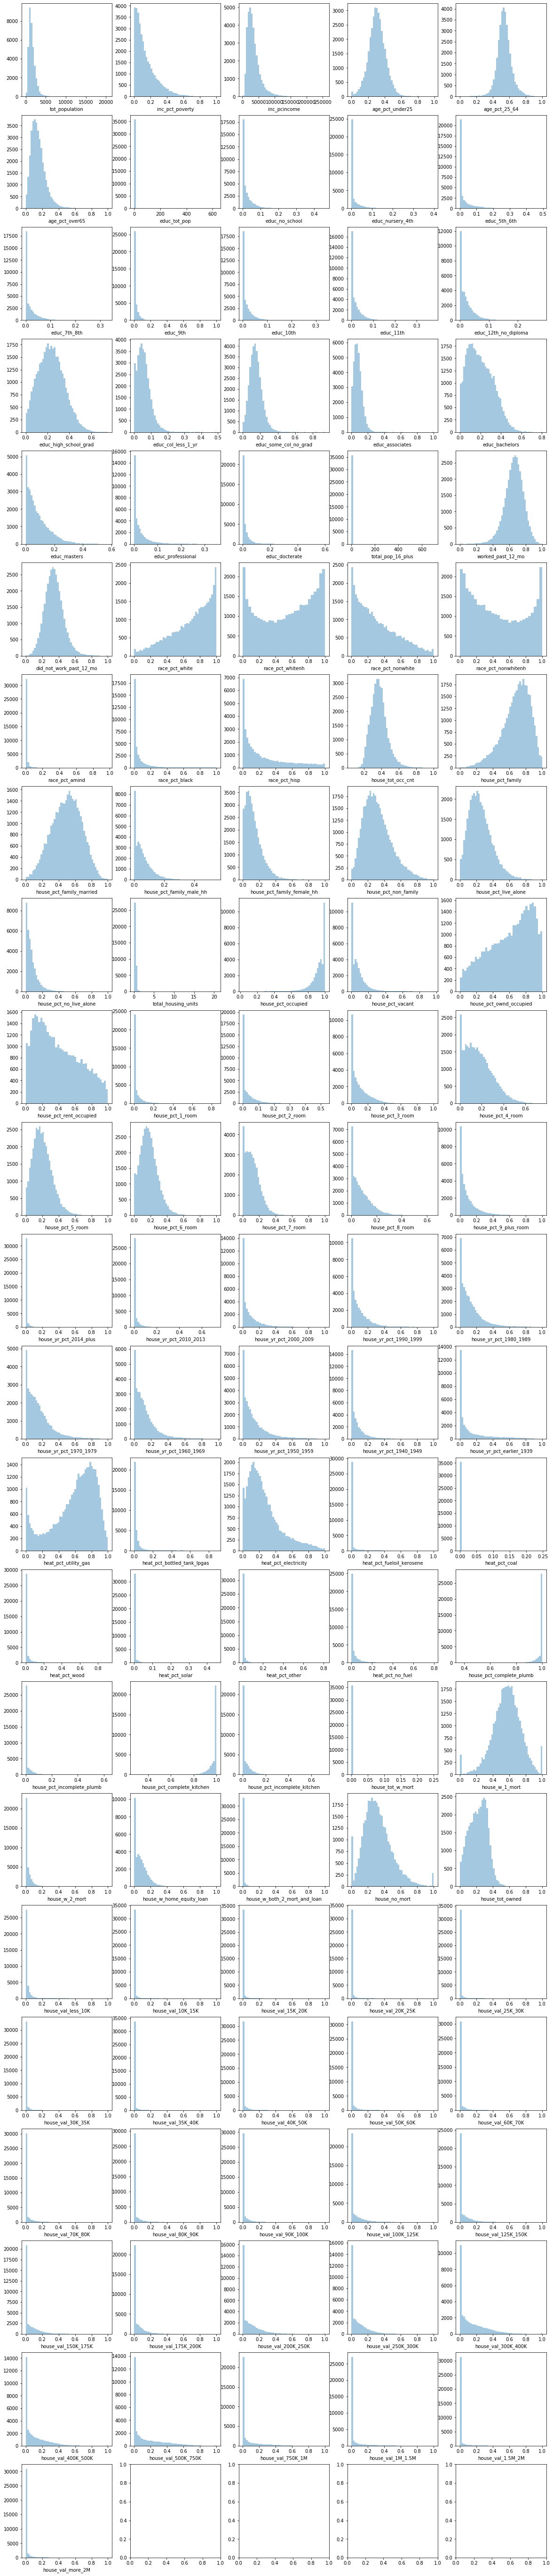

In [109]:
fig, axs = plt.subplots(no_of_rows, no_of_cols, figsize = [20, 100])
for i in range(no_of_rows):
    for j in range(no_of_cols):
        c = (i * no_of_cols) + j + 4
        if c < acs_block_4_states_df.shape[1]:
            sns.distplot(acs_block_4_states_df.iloc[:, c].dropna(), kde = False, ax = axs[i, j])
plt.savefig('../../data/acs_block_col_dist')

Address multicollinearity...

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, thresh = 5):
    """
    This function computes variance inflation factors for the features
    contained in the X dataframe and drops those with a value greater
    than the threshold (5 by default).
    """
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) \
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [111]:
acs_block_4_states_df.iloc[:, 4:].head()

,tot_population,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10K,house_val_10K_15K,house_val_15K_20K,house_val_20K_25K,house_val_25K_30K,house_val_30K_35K,house_val_35K_40K,house_val_40K_50K,house_val_50K_60K,house_val_60K_70K,house_val_70K_80K,house_val_80K_90K,house_val_90K_100K,house_val_100K_125K,house_val_125K_150K,house_val_150K_175K,house_val_175K_200K,house_val_200K_250K,house_val_250K_300K,house_val_300K_400K,house_val_400K_500K,house_val_500K_750K,house_val_750K_1M,house_val_1M_1.5M,house_val_1.5M_2M,house_val_more_2M
17812,2982,0.042254,115773.0,0.193581,0.552324,0.254096,0.808853,0.003317,0.003317,0.000000,0.000000,0.004561,0.000000,0.0,0.006633,0.032753,0.010365,0.075041,0.050995,0.316335,0.271144,0.150083,0.075456,0.879946,0.625762,0.374238,0.712805,0.692076,0.287195,0.307924,0.000000,0.028084,0.037780,0.420523,0.708931,0.623604,0.047049,0.038278,0.291069,0.197767,0.093301,0.452046,0.930267,0.069733,0.880383,0.119617,0.000000,0.012611,0.063056,0.071217,0.109050,0.169881,0.177300,0.106083,0.290801,0.000000,0.017062,0.109792,0.471068,0.090504,0.052671,0.082344,0.034125,0.062315,0.080119,0.862839,0.023923,0.113238,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.979228,0.020772,0.979228,0.020772,0.000221,0.544384,0.011775,0.103261,0.0,0.340580,0.370221,0.000000,0.0,0.006341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006341,0.0,0.0,0.007246,0.0,0.007246,0.0,0.000000,0.005435,0.00000,0.021739,0.050725,0.318841,0.264493,0.168478,0.143116
17813,1102,0.014519,88092.0,0.266788,0.538113,0.195100,0.733212,0.000000,0.000000,0.008663,0.000000,0.000000,0.022277,0.0,0.000000,0.028465,0.003713,0.051980,0.021040,0.396040,0.231436,0.168317,0.068069,0.781307,0.855981,0.144019,0.773140,0.705082,0.226860,0.294918,0.004537,0.007260,0.101633,0.401089,0.687783,0.565611,0.040724,0.081448,0.312217,0.203620,0.108597,0.401089,1.000000,0.000000,0.660633,0.339367,0.000000,0.013575,0.063348,0.095023,0.190045,0.140271,0.167421,0.149321,0.180995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042986,0.104072,0.092760,0.760181,0.911765,0.020362,0.052036,0.0,0.0,0.0,0.000000,0.000000,0.015837,1.000000,0.000000,1.000000,0.000000,0.000715,0.592466,0.000000,0.195205,0.0,0.212329,0.264973,0.020548,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.023973,0.000000,0.00000,0.000000,0.089041,0.243151,0.321918,0.208904,0.092466
17814,891,0.104377,71282.0,0.150838,0.654749,0.194413,0.852974,0.000000,0.0

In [112]:
acs_subset_df = calculate_vif(acs_block_4_states_df.iloc[:, 4:])

dropping 'heat_pct_no_fuel' at index: 73
dropping 'house_yr_pct_1990_1999' at index: 58
dropping 'house_pct_incomplete_kitchen' at index: 75
dropping 'house_pct_vacant' at index: 43
dropping 'house_pct_incomplete_plumb' at index: 72
dropping 'race_pct_nonwhitenh' at index: 29
dropping 'house_pct_3_room' at index: 46
dropping 'house_pct_rent_occupied' at index: 43
dropping 'house_pct_no_live_alone' at index: 39
dropping 'age_pct_over65' at index: 5
dropping 'house_w_home_equity_loan' at index: 71
dropping 'house_pct_family_male_hh' at index: 34
dropping 'race_pct_nonwhite' at index: 27
dropping 'house_val_300K_400K' at index: 91
dropping 'house_pct_non_family' at index: 34
dropping 'educ_high_school_grad' at index: 14
dropping 'worked_past_12_mo' at index: 22
dropping 'house_pct_complete_plumb' at index: 61
dropping 'house_pct_complete_kitchen' at index: 61
dropping 'house_pct_family' at index: 29
dropping 'house_tot_occ_cnt' at index: 28
dropping 'heat_pct_utility_gas' at index: 51
dro

In [116]:
acs_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35752 entries, 17812 to 188374
Data columns (total 67 columns):
inc_pct_poverty                 35752 non-null float64
educ_tot_pop                    35752 non-null float64
educ_no_school                  35752 non-null float64
educ_nursery_4th                35752 non-null float64
educ_5th_6th                    35752 non-null float64
educ_7th_8th                    35752 non-null float64
educ_9th                        35752 non-null float64
educ_10th                       35752 non-null float64
educ_11th                       35752 non-null float64
educ_12th_no_diploma            35752 non-null float64
educ_col_less_1_yr              35752 non-null float64
educ_associates                 35752 non-null float64
educ_professional               35752 non-null float64
educ_docterate                  35752 non-null float64
race_pct_amind                  35752 non-null float64
race_pct_black                  35752 non-null float64
house_

In [120]:
cols = list(acs_block_4_states_df.columns[:4])
cols.extend(list(acs_subset_df.columns))
acs_block_4_states_df = acs_block_4_states_df[cols]
acs_block_4_states_df.to_csv('../../data/acs_block_4_states_df.csv')

In [121]:
acs_block_4_states_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35752 entries, 17812 to 188374
Data columns (total 71 columns):
GEOID                           35752 non-null int64
county_name                     35752 non-null object
state_name                      35752 non-null object
NAME                            35752 non-null object
inc_pct_poverty                 35752 non-null float64
educ_tot_pop                    35752 non-null float64
educ_no_school                  35752 non-null float64
educ_nursery_4th                35752 non-null float64
educ_5th_6th                    35752 non-null float64
educ_7th_8th                    35752 non-null float64
educ_9th                        35752 non-null float64
educ_10th                       35752 non-null float64
educ_11th                       35752 non-null float64
educ_12th_no_diploma            35752 non-null float64
educ_col_less_1_yr              35752 non-null float64
educ_associates                 35752 non-null float64
educ_profes